In [42]:
import pandas as pd

# Data

In [43]:
# Read
data = pd.read_csv('covid_mex_20200401.csv')

In [44]:
# Region delta (ie, new cases)
cum_df = (data.groupby(['Region','Date_Symptoms'])['Date_Symptoms'].count()).to_frame()

In [45]:
# Rename because duplicate index
cum_df['Region_Delta'] = cum_df['Date_Symptoms']

In [46]:
# Region cumulative by date
cum_df['Region_Cumulative'] = cum_df.groupby(['Region'])['Region_Delta'].cumsum()

In [47]:
# Clean up
cum_df = cum_df.drop(['Date_Symptoms'], axis=1)

In [48]:
# Mexico cumulative by date
cum_df['Mexico_Cumulative'] = cum_df.groupby(['Date_Symptoms'])['Region_Cumulative'].cumsum()

In [49]:
# To view full table:
# from IPython.core.display import HTML
# display(HTML(cum_df.to_html()))

In [50]:
cum_df

Region_Delta  Region_Cumulative  \
Region         Date_Symptoms                                    
AGUASCALIENTES 3/10/2020                 1                  1   
               3/12/2020                 2                  3   
               3/14/2020                 1                  4   
               3/15/2020                 1                  5   
               3/16/2020                 2                  7   
...                                    ...                ...   
ZACATECAS      3/13/2020                 1                  2   
               3/18/2020                 1                  3   
               3/19/2020                 1                  4   
               3/21/2020                 1                  5   
               3/8/2020                  1                  6   

                              Mexico_Cumulative  
Region         Date_Symptoms                     
AGUASCALIENTES 3/10/2020                      1  
               3/12/2020                      3  
               3/14/2020                      4  
               3/15/2020                      5  
               3/16/2020                      7  
...                                         ...  
ZACATECAS      3/13/2020                    187  
               3/18/2020                    607  
               3/19/2020                    594  
               3/21/2020                    833  
               3/8/2020                     816  

[439 rows x 3 columns]

# Tables

In [51]:
pivot_tbl_cum = cum_df.reset_index().pivot('Region','Date_Symptoms','Region_Cumulative').T

In [52]:
pivot_tbl_delta = cum_df.reset_index().pivot('Region','Date_Symptoms','Region_Delta').T

In [53]:
pivot_tbl_delta.columns

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype='object', name='Region')

In [54]:
pivot_tbl_delta.head()

Region,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
Date_Symptoms,,,,,,,,,,,,,,,,,,,,,
2/17/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/19/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2/21/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/23/2020,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
pivot_tbl_cum.fillna(0).to_csv('output_data/mexico/confirmed_cases_by_symptoms_date.csv', index=True)
pivot_tbl_delta.fillna(0).to_csv('output_data/mexico/daily_confirmed_cases_by_symptoms_date.csv', index=True)

In [56]:
pivot_tbl_cum

Region,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
Date_Symptoms,,,,,,,,,,,,,,,,,,,,,
2/17/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/19/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2/21/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/22/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/23/2020,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/25/2020,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plots

In [57]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Confirmed cases

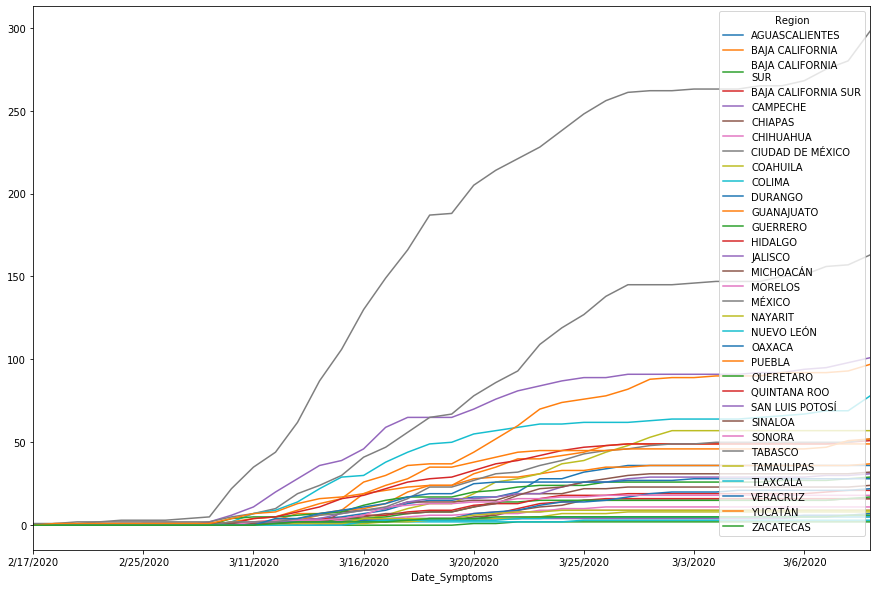

In [58]:
pivot_tbl_delta.fillna(0).cumsum().plot(figsize=(15,10))
#pivot_tbl_delta.fillna(0).cumsum()[['NUEVO LEÓN','CIUDAD DE MÉXICO','JALISCO']].plot(figsize=(15,10))